In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\sunee\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


### Change to your local directory where data files are copied

In [2]:
import pandas as pd
import os

os.chdir("./data")
os.getcwd()

'C:\\Users\\sunee\\OneDrive\\Documents\\Georgia Tech\\MS Analytics\\CSE 6242\\Project\\latest\\git_gatech\\CODE\\data'

### Read and filter HDI (Human Development Index) file

In [3]:
filename = "hdi/Human Development Index (HDI).csv"

df = pd.read_csv(filename, header = 0, skiprows=0, encoding='latin-1') 

df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]

df_hdi = pd.melt(df, id_vars=['Country', "HDI Rank"], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', \
                                             '1997', '1998', '1999', '2000', '2001', '2002', '2003', \
                                             '2004', '2005', '2006', '2007', '2008', '2009', '2010', \
                                             '2011', '2012', '2013', '2014', '2015', '2016', '2017', \
                                             '2018', '2019'],\
                                            var_name='Year', value_name='HDI')
df_hdi.head()

,Country,HDI Rank,Year,HDI
0,Afghanistan,169,1990,0.302
1,Albania,69,1990,0.650
2,Algeria,91,1990,0.572
3,Andorra,36,1990,..
4,Angola,148,1990,..


In [4]:
# Many countries have ".." or null values for HDI. Those countries are filtered out.

missing_hdi_countries = df_hdi[(df_hdi["HDI"]== "..") | (df_hdi["HDI"].isnull())].Country.unique()
missing_hdi_countries

array([' Andorra', ' Angola', ' Antigua and Barbuda', ' Azerbaijan',
       ' Bahamas', ' Belarus', ' Bhutan', ' Bosnia and Herzegovina',
       ' Burkina Faso', ' Cabo Verde', ' Chad', ' Comoros', ' Djibouti',
       ' Dominica', ' Equatorial Guinea', ' Eritrea', ' Ethiopia',
       ' Georgia', ' Grenada', ' Guinea-Bissau', ' Kiribati', ' Lebanon',
       ' Liberia', ' Liechtenstein', ' Madagascar', ' Maldives',
       ' Marshall Islands', ' Micronesia (Federated States of)',
       ' Montenegro', ' Nigeria', ' North Macedonia', ' Oman', ' Palau',
       ' Palestine, State of', ' Saint Kitts and Nevis', ' Saint Lucia',
       ' Saint Vincent and the Grenadines', ' Seychelles',
       ' Solomon Islands', ' South Sudan', ' Suriname', ' Timor-Leste',
       ' Turkmenistan', ' Uzbekistan', ' Vanuatu', 'Human Development',
       'Regions', nan], dtype=object)

In [5]:
# Remove countries with missing HDI values

df_hdi = df_hdi[~df_hdi["Country"].isin(missing_hdi_countries)]

# Remove entries which HDI Rank is not null

df_hdi = df_hdi[df_hdi["HDI Rank"].notnull()]
df_hdi = df_hdi[["Country", "Year", "HDI"]]

In [6]:
df_hdi["Country"] = df_hdi["Country"].str.strip()
df_hdi[df_hdi["Country"] == "United States"].head()

,Country,Year,HDI
180,United States,1990,0.865
387,United States,1991,0.867
594,United States,1992,0.872
801,United States,1993,0.877
1008,United States,1994,0.880


### Read and filter Inflation file

In [7]:
filename = "inflation/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_2917215.csv"

df = pd.read_csv(filename, header = 0, skiprows=0, encoding='utf-8') 
df = df.drop(columns = ["Country Code", "Indicator Name", "Indicator Code"])
df.rename(columns = {'Country Name': 'Country'}, inplace = True)


df_inflation = pd.melt(df, id_vars=['Country'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', \
                                             '1997', '1998', '1999', '2000', '2001', '2002', '2003', \
                                             '2004', '2005', '2006', '2007', '2008', '2009', '2010', \
                                             '2011', '2012', '2013', '2014', '2015', '2016', '2017', \
                                             '2018', '2019', '2020'],\
                                            var_name='Year', value_name='Inflation')
df_inflation.head()

,Country,Year,Inflation
0,Aruba,1990,5.836688
1,Africa Eastern and Southern,1990,12.457914
2,Afghanistan,1990,NaN
3,Africa Western and Central,1990,1.057361
4,Angola,1990,NaN


### Read and filter Infant Mortality file

In [8]:

filename = "infant_mortality/fusion_CME_UNICEF_1.0_all.csv"
df = pd.read_csv(filename, header = 0, skiprows=0, encoding='utf-8', low_memory= False) 
df = df[(df['INDICATOR:Indicator'] =='CME_MRY0: Infant mortality rate') \
        & (df['SEX:Sex'] == '_T: Total')\
        & (df['TIME_PERIOD:Time period'] > 1989)]

df = df[['REF_AREA:Country', 'TIME_PERIOD:Time period', 'OBS_VALUE:Observation Value']]
df = df.rename(columns = {"REF_AREA:Country" : "Country", \
                          "TIME_PERIOD:Time period" : "Year", \
                          "OBS_VALUE:Observation Value" : "Infant_Mortality"})

df['Country'] = df['Country'].str[5:]

df_infant_mortality = df.copy()
df_infant_mortality.head()

,Country,Year,Infant_Mortality
177,Afghanistan,1990,120.390072
178,Afghanistan,1991,116.779812
179,Afghanistan,1992,113.295508
180,Afghanistan,1993,109.929866
181,Afghanistan,1994,106.733450


### Read and filter GDP (Gross Domestic Product) file

In [9]:

filename = "gdp/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_2916517.csv"

df = pd.read_csv(filename, header = 0, skiprows=0, encoding='utf-8', low_memory= False) 
df = df.drop(columns = ["Country Code", "Indicator Name", "Indicator Code"])
df = df.rename(columns = {"Country Name": "Country"})

df_gdp = pd.melt(df, id_vars=['Country'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', \
                                             '1997', '1998', '1999', '2000', '2001', '2002', '2003', \
                                             '2004', '2005', '2006', '2007', '2008', '2009', '2010', \
                                             '2011', '2012', '2013', '2014', '2015', '2016', '2017', \
                                             '2018', '2019', '2020'],\
                                            var_name='Year', value_name='GDP')

df_gdp.head()

,Country,Year,GDP
0,Aruba,1990,12306.717679
1,Africa Eastern and Southern,1990,696.223892
2,Afghanistan,1990,NaN
3,Africa Western and Central,1990,594.899600
4,Angola,1990,948.338178


### Read and filter GNI (Gross National Income) file

In [10]:

filename = "gni/API_NY.GNP.PCAP.CD_DS2_en_csv_v2_2924224.csv"

df = pd.read_csv(filename, header = 0, skiprows=0, encoding='utf-8', low_memory= False) 
df = df.drop(columns = ["Country Code", "Indicator Name", "Indicator Code"])
df = df.rename(columns = {"Country Name": "Country"})

df_gni = pd.melt(df, id_vars=['Country'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', \
                                             '1997', '1998', '1999', '2000', '2001', '2002', '2003', \
                                             '2004', '2005', '2006', '2007', '2008', '2009', '2010', \
                                             '2011', '2012', '2013', '2014', '2015', '2016', '2017', \
                                             '2018', '2019', '2020'],\
                                            var_name='Year', value_name='GNI')

df_gni.head()

,Country,Year,GNI
0,Aruba,1990,12230.000000
1,Africa Eastern and Southern,1990,641.426872
2,Afghanistan,1990,NaN
3,Africa Western and Central,1990,556.079696
4,Angola,1990,780.000000


### Read and filter Forest Area file

In [11]:

filename = "forest_area/API_AG.LND.FRST.ZS_DS2_en_csv_v2_2917381.csv"

df = pd.read_csv(filename, header = 0, skiprows=0, encoding='utf-8', low_memory= False) 
df = df.drop(columns = ["Country Code", "Indicator Name", "Indicator Code"])
df = df.rename(columns = {"Country Name": "Country"})

df_forest = pd.melt(df, id_vars=['Country'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', \
                                             '1997', '1998', '1999', '2000', '2001', '2002', '2003', \
                                             '2004', '2005', '2006', '2007', '2008', '2009', '2010', \
                                             '2011', '2012', '2013', '2014', '2015', '2016', '2017', \
                                             '2018', '2019', '2020'],\
                                            var_name='Year', value_name='Forest_Area')

df_forest.head()

,Country,Year,Forest_Area
0,Aruba,1990,2.333333
1,Africa Eastern and Southern,1990,40.565912
2,Afghanistan,1990,1.850994
3,Africa Western and Central,1990,22.776908
4,Angola,1990,63.578070


In [12]:
# Filter out countries that have Forest_Area as 0 or blank in 1990. Eg Nauru, Qatar, Luxembourg

missing_forest_countries = df_forest[(df_forest["Forest_Area"] == 0) | (df_forest["Forest_Area"].isnull())].Country.unique()
missing_forest_countries

df_forest = df_forest[~df_forest["Country"].isin(missing_forest_countries)]
df_forest.head()

,Country,Year,Forest_Area
0,Aruba,1990,2.333333
1,Africa Eastern and Southern,1990,40.565912
2,Afghanistan,1990,1.850994
3,Africa Western and Central,1990,22.776908
4,Angola,1990,63.578070


### Read and filter Population file

In [13]:

filename = "population/API_EN.POP.DNST_DS2_en_csv_v2_2917301.csv"

df = pd.read_csv(filename, header = 0, skiprows=0, encoding='utf-8', low_memory= False) 
df = df.drop(columns = ["Country Code", "Indicator Name", "Indicator Code"])
df = df.rename(columns = {"Country Name": "Country"})

df_pop = pd.melt(df, id_vars=['Country'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', \
                                             '1997', '1998', '1999', '2000', '2001', '2002', '2003', \
                                             '2004', '2005', '2006', '2007', '2008', '2009', '2010', \
                                             '2011', '2012', '2013', '2014', '2015', '2016', '2017', \
                                             '2018', '2019', '2020'],\
                                            var_name='Year', value_name='Population')

df_pop.head()

,Country,Year,Population
0,Aruba,1990,345.288889
1,Africa Eastern and Southern,1990,20.615019
2,Afghanistan,1990,19.012209
3,Africa Western and Central,1990,22.640819
4,Angola,1990,9.503798


### Read and filter Unemployment file

In [14]:

filename = "unemployment/unemployment-rate.csv"

df = pd.read_csv(filename, header = 0, skiprows=0, encoding='utf-8', low_memory= False) 
df_unemp = df.drop('Code',axis=1)\
    .rename(columns={'Entity':'Country', 
    'Unemployment, total (% of total labor force) (modeled ILO estimate)':'Unemployment'})

df_unemp.head()

,Country,Year,Unemployment
0,Afghanistan,1991,11.38
1,Afghanistan,1992,11.46
2,Afghanistan,1993,11.61
3,Afghanistan,1994,11.65
4,Afghanistan,1995,11.65


In [15]:
# Strip whitespaces from country

df_hdi['Country'] = df_hdi['Country'].str.strip()
df_inflation['Country'] = df_inflation['Country'].str.strip()
df_infant_mortality['Country'] = df_infant_mortality['Country'].str.strip()
df_gdp['Country'] = df_gdp['Country'].str.strip()
df_gni['Country'] = df_gni['Country'].str.strip()
df_forest['Country'] = df_forest['Country'].str.strip()
df_pop['Country'] = df_pop['Country'].str.strip()
df_unemp['Country'] = df_unemp['Country'].str.strip()




In [16]:
# Convert year column to string in all factor dataframes

df_hdi["Year"] = df_hdi["Year"].astype('str')
df_inflation["Year"] = df_inflation["Year"].astype('str')
df_infant_mortality["Year"] = df_infant_mortality["Year"].astype('str')
df_gdp["Year"] = df_gdp["Year"].astype('str')
df_gni["Year"] = df_gni["Year"].astype('str')
df_forest["Year"] = df_forest["Year"].astype('str')
df_pop["Year"] = df_pop["Year"].astype('str')
df_unemp["Year"] = df_unemp["Year"].astype('str')


In [17]:
df_hdi['Country'] = df_hdi['Country'].map(lambda x: x.replace("\n", "").replace("  ", " ")\
                                                            .split("(", 1)[0].split(", T", 1)[0]\
                                                            .split(", A", 1)[0]\
                                                            .split(", I", 1)[0].strip())

df_inflation['Country'] = df_inflation['Country'].map(lambda x: x.replace("\n", "").replace("  ", " ")\
                                                            .split("(", 1)[0].split(", T", 1)[0]\
                                                            .split(", A", 1)[0]\
                                                            .split(", I", 1)[0].strip())

df_infant_mortality['Country'] = df_infant_mortality['Country'].map(lambda x: x.replace("\n", "").replace("  ", " ")\
                                                            .split("(", 1)[0].split(", T", 1)[0]\
                                                            .split(", A", 1)[0]\
                                                            .split(", I", 1)[0].strip())

df_gdp['Country'] = df_gdp['Country'].map(lambda x: x.replace("\n", "").replace("  ", " ")\
                                                            .split("(", 1)[0].split(", T", 1)[0]\
                                                            .split(", A", 1)[0]\
                                                            .split(", I", 1)[0].strip())

df_gni['Country'] = df_gni['Country'].map(lambda x: x.replace("\n", "").replace("  ", " ")\
                                                            .split("(", 1)[0].split(", T", 1)[0]\
                                                            .split(", A", 1)[0]\
                                                            .split(", I", 1)[0].strip())

df_forest['Country'] = df_forest['Country'].map(lambda x: x.replace("\n", "").replace("  ", " ")\
                                                            .split("(", 1)[0].split(", T", 1)[0]\
                                                            .split(", A", 1)[0]\
                                                            .split(", I", 1)[0].strip())

df_pop['Country'] = df_pop['Country'].map(lambda x: x.replace("\n", "").replace("  ", " ")\
                                                            .split("(", 1)[0].split(", T", 1)[0]\
                                                            .split(", A", 1)[0]\
                                                            .split(", I", 1)[0].strip())

df_unemp['Country'] = df_unemp['Country'].map(lambda x: x.replace("\n", "").replace("  ", " ")\
                                                            .split("(", 1)[0].split(", T", 1)[0]\
                                                            .split(", A", 1)[0]\
                                                            .split(", I", 1)[0].strip())


In [18]:
# Merge all the factor dataframes

temp_df = pd.merge(df_hdi, df_inflation, how = "outer", left_on = ["Country", "Year"], right_on = ["Country", "Year"])
temp_df = pd.merge(temp_df, df_infant_mortality, how = "outer", left_on = ["Country", "Year"], right_on = ["Country", "Year"])
temp_df = pd.merge(temp_df, df_gdp, how = "outer", left_on = ["Country", "Year"], right_on = ["Country", "Year"])
temp_df = pd.merge(temp_df, df_gni, how = "outer", left_on = ["Country", "Year"], right_on = ["Country", "Year"])
temp_df = pd.merge(temp_df, df_forest, how = "outer", left_on = ["Country", "Year"], right_on = ["Country", "Year"])
temp_df = pd.merge(temp_df, df_pop, how = "outer", left_on = ["Country", "Year"], right_on = ["Country", "Year"])
temp_df = pd.merge(temp_df, df_unemp, how = "outer", left_on = ["Country", "Year"], right_on = ["Country", "Year"])

# temp_df.count
# len(temp_df["Country"].unique())
# temp_df.loc[temp_df["Country"] == "India"].head()

In [19]:
# Country list downloaded from https://unstats.un.org/unsd/methodology/m49/overview/

filename = "./country/UNSD - Country_List.csv"

df_country = pd.read_csv(filename, header = 0, skiprows=0, encoding='utf-8') 
df_country = df_country[["Country or Area", "Region Name", "Developed / Developing Countries"]]
df_country = df_country.rename(columns = {"Country or Area" : "Country", \
                          "Region Name" : "Continent", \
                          "Developed / Developing Countries" : "Development_Status"})

df_country = df_country.reset_index()
df_country = df_country.rename(columns={"index":"Country_ID"})
df_country.head()

,Country_ID,Country,Continent,Development_Status
0,0,Algeria,Africa,Developing
1,1,Egypt,Africa,Developing
2,2,Libya,Africa,Developing
3,3,Morocco,Africa,Developing
4,4,Sudan,Africa,Developing


In [20]:
df_final = pd.merge(temp_df, df_country, how = "outer", left_on = ["Country"], right_on = ["Country"])
df_final.head()

,Country,Year,HDI,Inflation,Infant_Mortality,GDP,GNI,Forest_Area,Population,Unemployment,Country_ID,Continent,Development_Status
0,Afghanistan,1990,0.302,NaN,120.390072,NaN,NaN,1.850994,19.012209,NaN,139.0,Asia,Developing
1,Afghanistan,1991,0.307,NaN,116.779812,NaN,NaN,1.850994,20.370395,11.38,139.0,Asia,Developing
2,Afghanistan,1992,0.316,NaN,113.295508,NaN,NaN,1.850994,22.187824,11.46,139.0,Asia,Developing
3,Afghanistan,1993,0.312,NaN,109.929866,NaN,NaN,1.850994,24.226635,11.61,139.0,Asia,Developing
4,Afghanistan,1994,0.307,NaN,106.733450,NaN,NaN,1.850994,26.155268,11.65,139.0,Asia,Developing


In [21]:
# Data imputation for missing values

df_final = df_final.ffill().bfill()
df_final.columns=[str(i).lower() for i in df_final.columns]

df_final.head()

,country,year,hdi,inflation,infant_mortality,gdp,gni,forest_area,population,unemployment,country_id,continent,development_status
0,Afghanistan,1990,0.302,12.686269,120.390072,179.426579,450.0,1.850994,19.012209,11.38,139.0,Asia,Developing
1,Afghanistan,1991,0.307,12.686269,116.779812,179.426579,450.0,1.850994,20.370395,11.38,139.0,Asia,Developing
2,Afghanistan,1992,0.316,12.686269,113.295508,179.426579,450.0,1.850994,22.187824,11.46,139.0,Asia,Developing
3,Afghanistan,1993,0.312,12.686269,109.929866,179.426579,450.0,1.850994,24.226635,11.61,139.0,Asia,Developing
4,Afghanistan,1994,0.307,12.686269,106.733450,179.426579,450.0,1.850994,26.155268,11.65,139.0,Asia,Developing


In [22]:
# Convert all columns in df_country to lower case
df_country.columns=[str(i).lower() for i in df_country.columns]

# Convert all str columns in df_country to upper case and write to file
df_country.apply(lambda x: x.astype(str).str.upper()).to_csv('data_countries.csv', index=False)

# Convert all columns to lower case in df_final
df_final.columns=[str(i).lower() for i in df_final.columns]

In [23]:
df_final["hdi"] = df_final["hdi"].astype("float")
df_final.dtypes

country                object
year                   object
hdi                   float64
inflation             float64
infant_mortality      float64
gdp                   float64
gni                   float64
forest_area           float64
population            float64
unemployment          float64
country_id            float64
continent              object
development_status     object
dtype: object

### Calculate %age change in factors on a YoY basis

In [24]:
exclude_list = ['inflation', 'forest_area', 'unemployment']

for col in df_final.columns:
    if (df_final.dtypes[col] == "float64") and (col not in exclude_list):
        temp = ''
        temp = col + "_pct_change"
        df_final['shifted']=df_final.sort_values(by='year',ascending=True).groupby(['country'])[col].shift(1)
        df_final[temp]=(df_final[col] - df_final['shifted']) / df_final[col]
        df_final.drop('shifted',axis=1,inplace=True)
df_final = df_final[['year', 'hdi_pct_change', 'inflation', 'infant_mortality_pct_change', 'gdp_pct_change', 'gni_pct_change', 'population_pct_change', 'unemployment', 'country_id', 'forest_area']]        

# Inflation, Unemployment and forest area are already in %age. So no need to calculate %age YoY change

df_final["forest_area"] = df_final["forest_area"] / 100
df_final["inflation"] = df_final["inflation"] / 100
df_final["unemployment"] = df_final["unemployment"] / 100

# Rename percentage change columns
df_final.rename(columns = {'hdi_pct_change' : 'hdi',
                           'infant_mortality_pct_change' : 'infant_mortality',
                           'gdp_pct_change' : 'gdp', 
                           'gni_pct_change' : 'gni', 
                           'forest_area' : 'forest', 
                           'population_pct_change' : 'population'}, inplace= True)

# Add a column called "info" which will store actual / predicted value
df_final['info'] = 'actual'

df_final = df_final[["year", "hdi", "inflation", "infant_mortality", "gdp","gni", 
                     "forest", "population", "unemployment","country_id", "info" ]]


In [25]:
# filter out 1990 as it is the first year and has not percentage change associated with it

df_final = df_final[df_final['year'] != "1990"]

# df_final[df_final['country_id'] == 142].head()

In [26]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# df_plot = df_final[["hdi", "gdp", "gni", "inflation", "infant_mortality", "unemployment", "population"]]

# fig = plt.figure(figsize = (12,8))
# sns.boxplot(data=df_plot)
# plt.show()

In [27]:
# filter for outliers - countries that have unusually high values for KPIs.

df_final = df_final[(df_final["inflation"] > -10) & (df_final["inflation"] < 10) & \
        (df_final["gdp"] > -100) & (df_final["gdp"] < 100) & \
        (df_final["gni"] > -100) & (df_final["gni"] < 100) &\
        (df_final["population"] > -100) & (df_final["population"] < 100)]

df_final.head()

,year,hdi,inflation,infant_mortality,gdp,gni,forest,population,unemployment,country_id,info
1,1991,0.016287,0.126863,-0.030915,0.0,0.0,0.01851,0.066674,0.1138,139.0,actual
2,1992,0.028481,0.126863,-0.030754,0.0,0.0,0.01851,0.081911,0.1146,139.0,actual
3,1993,-0.012821,0.126863,-0.030616,0.0,0.0,0.01851,0.084156,0.1161,139.0,actual
4,1994,-0.016287,0.126863,-0.029948,0.0,0.0,0.01851,0.073738,0.1165,139.0,actual
5,1995,0.072508,0.126863,-0.029041,0.0,0.0,0.01851,0.057145,0.1165,139.0,actual


<ipython-input-28-0a02c0a3047b>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-28-0a02c0a3047b>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')


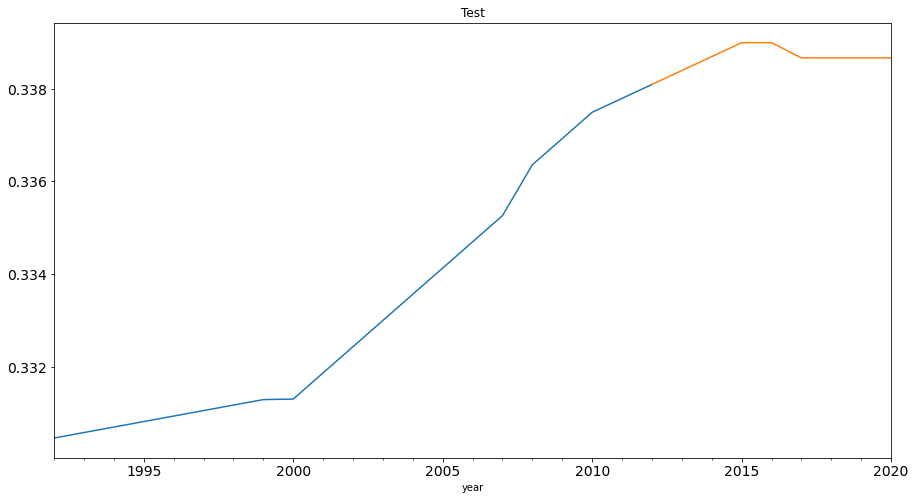

In [28]:
# Sample time series forecast for country_id = 116

import matplotlib.pyplot as plt 
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

x = df_final.copy()
x = x[x["country_id"] == 116]
x = x[["year", "forest"]]
# len(x)

train=x[1:22] 
test= x[21:]

# train

train.Timestamp = pd.to_datetime(train.year,format='%Y') 
train.index = train.Timestamp 
train = train.resample('Y').mean() 

test.Timestamp = pd.to_datetime(test.year,format='%Y') 
test.index = test.Timestamp
test = test.resample('Y').mean()

train.forest.plot(figsize=(15,8), title= 'Train', fontsize=14)
test.forest.plot(figsize=(15,8), title= 'Test', fontsize=14)
plt.show()

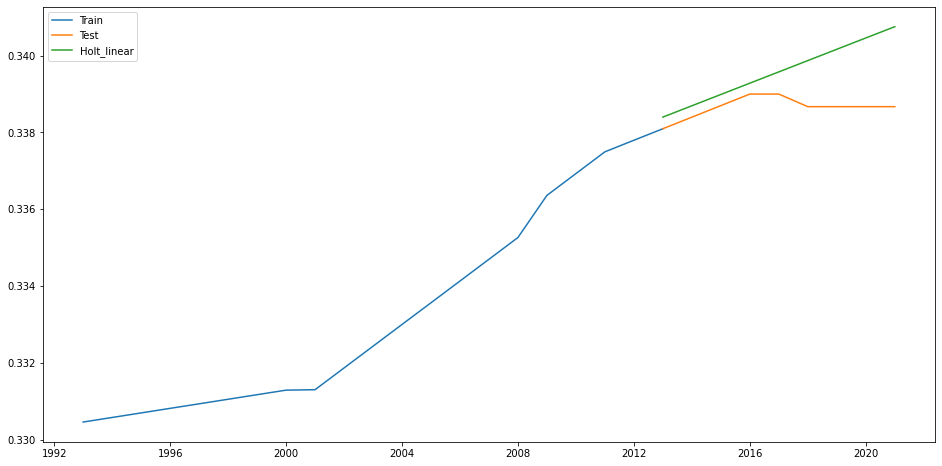

In [29]:
# Fitting the model for country_id = 116
import numpy as np
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.9)

# y_hat_avg['SES'] = fit2.forecast(len(test))
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

# y_hat_avg
plt.figure(figsize=(16,8))
plt.plot(train['forest'], label='Train')
plt.plot(test['forest'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [30]:
# Calculate accuracy of fit

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.forest, y_hat_avg.Holt_linear))
print(rms)

0.0011489358748726208


In [31]:
# Predict for year 2021 to 2025
data = {'years': [2021,2022,2023,2024,2025], 'forecast': [0,0,0,0,0]}
predict = pd.DataFrame(data=data)
predict['forecast'] = fit1.forecast(len(predict))
predict

,years,forecast
0,2021,0.338398
1,2022,0.338692
2,2023,0.338987
3,2024,0.339281
4,2025,0.339575


### Forest cover Prediction for next 5 years for all countries based on Holt Winter model

In [32]:
# Predict next 5 years score for all countries based on Holt Winter model 
country_list = []
country_list =  list(df_final.country_id.unique())

for country_id in country_list:
    
    data = {'year': [2021,2022,2023,2024,2025], 'forest': [0,0,0,0,0]}
    predict = pd.DataFrame(data=data)
    print(country_id)
    
    x = df_final.copy()
    x = x[x["country_id"] == country_id]
    x = x[["year", "forest"]]

    train=x[1:25] 
    test= x[24:]

    train.Timestamp = pd.to_datetime(train.year,format='%Y') 
    train.index = train.Timestamp 
    train = train.resample('Y').mean() 

    test.Timestamp = pd.to_datetime(test.year,format='%Y') 
    test.index = test.Timestamp
    test = test.resample('Y').mean()
    
    y_hat_avg = test.copy()
#     fit2 = SimpleExpSmoothing(np.asarray(train['forest_area'])).fit(smoothing_level=0.75,optimized=False)
#     y_hat_avg['SES'] = fit2.forecast(len(test))
    fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
    y_hat_avg['Holt_linear'] = fit1.forecast(len(test))
    

    predict['country_id'] = country_id
    predict['info'] = 'predicted'
#     predict['forest_area'] = fit2.forecast(len(predict))
    predict['forest'] = fit1.forecast(len(predict))
    
    
    df_final = pd.concat([df_final, predict], join = "outer")
    
    
    


139.0
193.0
0.0
96.0
148.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1409: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
c:\users\sunee\appdata\local\programs\python\py

218.0


c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn

209.0
150.0
140.0
64.0
210.0


<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
c:\users\sunee\appdata\local\programs\python\pyt

88.0
43.0
38.0
99.0


<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning:

128.0
167.0


c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn

8.0
129.0
30.0
113.0


<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-in

31.0
100.0
122.0
101.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

33.0
89.0
196.0


c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn

68.0
151.0
168.0
180.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

71.0
102.0
1.0
90.0
181.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

39.0
224.0
183.0
211.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

36.0
47.0
212.0
48.0
198.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

91.0
49.0
105.0
74.0
92.0


<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning:

169.0
184.0
142.0
130.0
153.0

<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-


185.0
154.0
200.0
75.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

125.0
155.0
117.0


c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn

14.0
156.0
118.0
131.0
187.0


c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1415: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1409: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1415: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: P

40.0
2.0
188.0
214.0
16.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1409: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
c:\users\sunee\appdata\local\programs\python\py

132.0
52.0
201.0
53.0
17.0


c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1415: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>

93.0
126.0
3.0
19.0
133.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

41.0
145.0
216.0
222.0
94.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

54.0
189.0
146.0
95.0
226.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

106.0
107.0
134.0
170.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

204.0
159.0
172.0
173.0
21.0

<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-


242.0
37.0
160.0
57.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

206.0
58.0
135.0
174.0
207.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

42.0
208.0
147.0
4.0
191.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

217.0
162.0
119.0
136.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

59.0
244.0
85.0
5.0
163.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1409: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
c:\users\sunee\appdata\local\programs\python\py

25.0
175.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


164.0
192.0
116.0
110.0
138.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

165.0
27.0
28.0
62.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1409: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
c:\users\sunee\appdata\local\programs\python\py

29.0
194.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1409: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
c:\users\sunee\appdata\local\programs\python\py

237.0
61.0
149.0
44.0
63.0


<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-in

195.0
166.0


c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
c:\users\sunee\appdata\local\programs\python\python38-32\lib\

112.0
141.0
9.0
45.0


<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-in

67.0
10.0
70.0
11.0


c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn

12.0
182.0
152.0
197.0
50.0


c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1415: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>

35.0
72.0
114.0
229.0
186.0


c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1409: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1415: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1409: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1415: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\t

230.0
157.0
51.0
213.0
215.0


<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-in

15.0
144.0
231.0
203.0
202.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

234.0
225.0
55.0
233.0
158.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

235.0
78.0
239.0
227.0
205.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-

23.0
24.0
109.0
22.0
86.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1409: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
c:\users\sunee\appdata\local\programs\python\py

32.0
120.0
137.0
245.0
121.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1409: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
c:\users\sunee\appdata\local\programs\python\py

66.0
228.0
34.0
238.0
80.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1409: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
c:\users\sunee\appdata\local\programs\python\py

127.0
81.0
171.0
240.0
124.0


<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
<ipython-input-32-4a453f1d398e>:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1409: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
c:\users\sunee\appdata\local\programs\python\py

161.0
26.0
83.0
87.0


c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1415: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1409: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
c:\users\sunee\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1415: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
<ipython-input-32-4a453f1d398e>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-32-4a453f1d398e>:22: UserWarning: P

In [33]:
# Round to forest cover % and KPI %age to 4  decimal places

for col in df_final.columns:
    if df_final.dtypes[col] == "float64" :
        df_final[col] = df_final[col].round(decimals = 4)

df_final["country_id"] = df_final["country_id"].astype(int)

df_final.tail()

,year,hdi,inflation,infant_mortality,gdp,gni,forest,population,unemployment,country_id,info
0,2021,NaN,NaN,NaN,NaN,NaN,0.0104,NaN,NaN,87,predicted
1,2022,NaN,NaN,NaN,NaN,NaN,0.0104,NaN,NaN,87,predicted
2,2023,NaN,NaN,NaN,NaN,NaN,0.0104,NaN,NaN,87,predicted
3,2024,NaN,NaN,NaN,NaN,NaN,0.0104,NaN,NaN,87,predicted
4,2025,NaN,NaN,NaN,NaN,NaN,0.0104,NaN,NaN,87,predicted


In [34]:
# Write to measurements file

df_final.to_csv('data_measurements.csv', index=False)

### Web Scraping to update income classification for all countries (df_country)

In [35]:
from urllib.request import urlopen

In [36]:
url = "https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups"
page = urlopen(url)
page

In [37]:
html_bytes = page.read()
html = html_bytes.decode("utf-8")
# print(html)

In [38]:
# LOW-INCOME ECONOMIES ($1,045 OR LESS)
low_income_start_index = html.find("LOW-INCOME ECONOMIES\n($1,045 OR LESS)")
low_income_start_index


21754

In [39]:
low_income_end_index = html.find("LOWER-MIDDLE INCOME")
low_income_end_index


23487

In [40]:
# html[low_income_start_index: low_income_end_index]

In [41]:
# Using regular expression to parse countries
import regex as re

pattern = re.compile(r"""<td[^>]*>(?:<[^>]*>|&\w*;|\\u[a-f\d]*)*((?:[^<&\\]+|\\n)+)""", re.VERBOSE)

matches = re.finditer(pattern, html[low_income_start_index: low_income_end_index])
low_income_countries = []
for match in matches:
    low_income_countries.append(match[1].upper())

low_income_countries = sorted(low_income_countries)
low_income_countries = low_income_countries[2:-1]
print(low_income_countries)

['AFGHANISTAN', 'BURKINA FASO', 'BURUNDI', 'CENTRAL AFRICAN\n  REPUBLIC', 'CHAD', 'CONGO, DEM. REP', 'ERITREA', 'ETHIOPIA', 'GAMBIA, THE', 'GUINEA', 'GUINEA-BISSAU', "KOREA, DEM. PEOPLE'S REP", 'LIBERIA', 'MADAGASCAR', 'MALAWI', 'MALI', 'MOZAMBIQUE', 'NIGER', 'RWANDA', 'SIERRA LEONE', 'SOMALIA', 'SOUTH SUDAN', 'SUDAN', 'TOGO', 'UGANDA', 'YEMEN, REP.']


In [42]:
# LOWER-MIDDLE INCOME ECONOMIES ($1,046 TO $4,095)
low_middle_income_start_index = html.find("LOWER-MIDDLE INCOME")
low_middle_income_start_index

23487

In [43]:
low_middle_income_end_index = html.find("UPPER-MIDDLE-INCOME")
low_middle_income_end_index

25906

In [44]:
# html[low_middle_income_start_index: low_middle_income_end_index]

In [45]:
matches = re.finditer(pattern, html[low_middle_income_start_index: low_middle_income_end_index])
low_middle_income_countries = []
for match in matches:
    low_middle_income_countries.append(match[1].upper())

low_middle_income_countries = sorted(low_middle_income_countries)
low_middle_income_countries = low_middle_income_countries[1:] 
print(low_middle_income_countries)

['ALGERIA', 'ANGOLA', 'BANGLADESH', 'BELIZE', 'BENIN', 'BHUTAN', 'BOLIVIA', 'CABO VERDE', 'CAMBODIA', 'CAMEROON', 'COMOROS', 'CONGO, REP.', "CÔTE D'IVOIRE", 'DJIBOUTI', 'EGYPT, ARAB REP.', 'EL SALVADOR', 'ESWATINI', 'GHANA', 'HAITI', 'HONDURAS', 'INDIA', 'INDONESIA', 'IRAN, ISLAMIC REP', 'KENYA', 'KIRIBATI', 'KYRGYZ REPUBLIC', 'LAO PDR', 'LESOTHO', 'MAURITANIA', 'MICRONESIA, FED. STS.', 'MONGOLIA', 'MOROCCO', 'MYANMAR', 'NEPAL', 'NICARAGUA', 'NIGERIA', 'PAKISTAN', 'PAPUA NEW GUINEA', 'PHILIPPINES', 'SAMOA', 'SENEGAL', 'SOLOMON ISLANDS', 'SRI LANKA', 'SÃO TOMÉ AND PRINCIPE', 'TAJIKISTAN', 'TANZANIA', 'TIMOR-LESTE', 'TUNISIA', 'UKRAINE', 'UZBEKISTAN', 'VANUATU', 'VIETNAM', 'WEST BANK AND GAZA', 'ZAMBIA', 'ZIMBABWE']


In [46]:
# UPPER-MIDDLE-INCOME ECONOMIES ($4,096 TO $12,695)
upper_middle_income_start_index = html.find("UPPER-MIDDLE-INCOME")
upper_middle_income_start_index

25906

In [47]:
upper_middle_income_end_index = html.find("HIGH-INCOME ECONOMIES")
upper_middle_income_end_index

30799

In [48]:
# html[upper_middle_income_start_index: upper_middle_income_end_index]

In [49]:
matches = re.finditer(pattern, html[upper_middle_income_start_index: upper_middle_income_end_index])
upper_middle_income_countries = []
for match in matches:
    upper_middle_income_countries.append(match[1].upper())

upper_middle_income_countries = sorted(upper_middle_income_countries)
upper_middle_income_countries = upper_middle_income_countries[ 1:-1]
print(upper_middle_income_countries)

['ALBANIA', 'AMERICAN SAMOA', 'ARGENTINA', 'ARMENIA', 'AZERBAIJAN', 'BELARUS', 'BOSNIA AND\n  HERZEGOVINA', 'BOTSWANA', 'BRAZIL', 'BULGARIA', 'CHINA', 'COLOMBIA', 'COSTA RICA', 'CUBA', 'DOMINICA', 'DOMINICAN REPUBLIC', 'ECUADOR', 'EQUATORIAL GUINEA', 'FIJI', 'GABON', 'GEORGIA', 'GRENADA', 'GUATEMALA', 'GUYANA', 'IRAQ', 'JORDAN', 'KAZAKHSTAN', 'KOSOVO', 'LEBANON', 'LIBYA', 'MALAYSIA', 'MALDIVES', 'MARSHALL ISLANDS', 'MAURITIUS', 'MEXICO', 'MOLDOVA', 'MONTENEGRO', 'NAMIBIA', 'NORTH MACEDONIA', 'PANAMA', 'PARAGUAY', 'PERU ', 'ROMANIA', 'RUSSIAN FEDERATION', 'SERBIA', 'SOUTH AFRICA', 'ST. LUCIA', 'ST. VINCENT AND THE\n  GRENADINES', 'SURINAME', 'THAILAND', 'TONGA', 'TURKEY', 'TURKMENISTAN', 'TUVALU']


In [50]:
# HIGH-INCOME ECONOMIES ($12,696 OR MORE)
high_income_start_index = upper_middle_income_end_index
high_income_start_index

30799

In [51]:
high_income_end_index = html.find("<br>IDA</b>")
high_income_end_index

34472

In [52]:
# html[high_income_start_index:high_income_end_index]

In [53]:
matches = re.finditer(pattern, html[high_income_start_index: high_income_end_index])
high_income_countries = []
for match in matches:
    high_income_countries.append(match[1].upper())

high_income_countries = sorted(high_income_countries)
high_income_countries = high_income_countries[2:]
print(high_income_countries)

['ANDORRA', 'ANTIGUA AND\n  BARBUDA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 'BAHAMAS, THE', 'BAHRAIN', 'BARBADOS', 'BELGIUM', 'BERMUDA', 'BRITISH VIRGIN\n  ISLANDS', 'BRUNEI\n  DARUSSALAM', 'CANADA', 'CAYMAN ISLANDS', 'CHANNEL ISLANDS', 'CHILE', 'CROATIA', 'CURAÇAO', 'CYPRUS', 'CZECH REPUBLIC', 'DENMARK', 'ESTONIA', 'FAROE ISLANDS', 'FINLAND', 'FRANCE', 'FRENCH POLYNESIA', 'GERMANY', 'GIBRALTAR', 'GREECE', 'GREENLAND', 'GUAM', 'HONG KONG SAR, CHINA', 'HUNGARY', 'ICELAND', 'IRELAND', 'ISLE OF MAN', 'ISRAEL', 'ITALY', 'JAPAN', 'KOREA, REP.', 'KUWAIT', 'LATVIA', 'LIECHTENSTEIN', 'LITHUANIA', 'LUXEMBOURG', 'MACAO SAR, CHINA', 'MALTA', 'MONACO', 'NAURU', 'NETHERLANDS', 'NEW CALEDONIA', 'NEW ZEALAND', 'NORTHERN MARIANA ISLANDS', 'NORWAY', 'OMAN', 'PALAU', 'POLAND', 'PORTUGAL', 'PUERTO RICO', 'QATAR', 'SAN MARINO', 'SAUDI ARABIA', 'SEYCHELLES', 'SINGAPORE', 'SINT MAARTEN (DUTCH PART)', 'SLOVAK REPUBLIC', 'SLOVENIA', 'SPAIN', 'ST. KITTS AND NEVIS', 'ST. MARTIN (FRENCH PART)', 'SWEDEN', 'SWITZERLAND

In [54]:
# Concatentate all income class countries into one dictionary and convert to a dataframe

dict_income_class = {}
for c in low_income_countries:
        dict_income_class[c] = "Low Income"
for c in low_middle_income_countries:
        dict_income_class[c] = "Low Middle Income"
for c in upper_middle_income_countries:
        dict_income_class[c] = "Upper Middle Income"
for c in high_income_countries:
        dict_income_class[c] = "High Income"

df_income_class = pd.DataFrame(dict_income_class.items(), columns=['country', 'income'])
df_income_class

,country,income
0,AFGHANISTAN,Low Income
1,BURKINA FASO,Low Income
2,BURUNDI,Low Income
3,CENTRAL AFRICAN\n REPUBLIC,Low Income
4,CHAD,Low Income
...,...,...
210,UNITED ARAB EMIRATES,High Income
211,UNITED KINGDOM,High Income
212,UNITED STATES,High Income
213,URUGUAY,High Income


In [55]:
df_country["country"] = df_country["country"].str.upper()
df_country

,country_id,country,continent,development_status
0,0,ALGERIA,Africa,Developing
1,1,EGYPT,Africa,Developing
2,2,LIBYA,Africa,Developing
3,3,MOROCCO,Africa,Developing
4,4,SUDAN,Africa,Developing
...,...,...,...,...
242,242,SAMOA,Oceania,Developing
243,243,TOKELAU,Oceania,Developing
244,244,TONGA,Oceania,Developing
245,245,TUVALU,Oceania,Developing


In [56]:
# Standardize df_income_class and df_country for country names

df_income_class['country'] = df_income_class['country'].map(lambda x: x.replace("\n", "").replace("  ", " ")\
                                                            .split("(", 1)[0].split(", T", 1)[0]\
                                                            .split(", A", 1)[0]\
                                                            .split(", I", 1)[0].strip())

df_country['country'] = df_country['country'].map(lambda x: x.replace("\n", "").replace("  ", " ")\
                                                            .split("(", 1)[0].split(", T", 1)[0]\
                                                            .split(", A", 1)[0]\
                                                            .split(", I", 1)[0].strip())



In [57]:
# Standardize country names where the names dont match between the country file and scrapped country name

change_country_list = {"HONG KONG SAR, CHINA" : "HONG KONG, CHINA",
                        "KOREA, DEM. PEOPLE'S REP" : "DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA",
                        "KOREA, REP." : "REPUBLIC OF KOREA",
                        "YEMEN, REP." : "YEMEN",
                        "CONGO, DEM. REP" : "DEMOCRATIC REPUBLIC OF THE CONGO",
                        "CONGO, REP." : "CONGO",
                        "VIETNAM" :"VIET NAM",
                        "TANZANIA" : "UNITED REPUBLIC OF TANZANIA",
                        "KYRGYZ REPUBLIC" : "KYRGYZSTAN",
                        "MOLDOVA" : "REPUBLIC OF MOLDOVA",
                        "CZECH REPUBLIC" :"CZECHIA",
                        "SLOVAK REPUBLIC" : "SLOVAKIA",
                        "LAO PDR":"LAO PEOPLE'S DEMOCRATIC REPUBLIC"
}

for country, correct_country in change_country_list.items():
    df_income_class.loc[df_income_class["country"] == country, "country"] = change_country_list[country]

In [58]:
# Add country names to country file which are missing in the website
extra_countries = list({37, 75, 80, 81, 83, 87, 161, 162, 238, 240})
extra_countries

for c in list(df_country[df_country['country_id'].isin(extra_countries)]["country"]):
    df_income_class = df_income_class.append({'country': c, 'income' : 'Not Available' }, ignore_index=True)
    
df_income_class[df_income_class["income"].str.contains("Not")]

,country,income
215,SAO TOME AND PRINCIPE,Not Available
216,JAMAICA,Not Available
217,SAINT KITTS AND NEVIS,Not Available
218,SAINT LUCIA,Not Available
219,SAINT VINCENT AND THE GRENADINES,Not Available
220,UNITED STATES VIRGIN ISLANDS,Not Available
221,STATE OF PALESTINE,Not Available
222,SYRIAN ARAB REPUBLIC,Not Available
223,COOK ISLANDS,Not Available
224,NIUE,Not Available


In [59]:
# Delete ids for which there are no entries in measurement file

remove_from_df_country = [69, 84, 97, 123, 143]
df_country = df_country[~df_country['country_id'].isin(remove_from_df_country)]
df_country

,country_id,country,continent,development_status
0,0,ALGERIA,Africa,Developing
1,1,EGYPT,Africa,Developing
2,2,LIBYA,Africa,Developing
3,3,MOROCCO,Africa,Developing
4,4,SUDAN,Africa,Developing
...,...,...,...,...
242,242,SAMOA,Oceania,Developing
243,243,TOKELAU,Oceania,Developing
244,244,TONGA,Oceania,Developing
245,245,TUVALU,Oceania,Developing


In [60]:
df_country = df_country[["country_id", "country", "continent", "development_status"]]
df_country = pd.merge(df_country, df_income_class, on = "country", how = "inner")

# Remove extra countries for which data is not available for analysis

df_country = df_country[~df_country["country_id"].isnull()]


In [61]:
df_country[df_country["country"].str.contains("RUS")]

,country_id,country,continent,development_status,income
104,128,BRUNEI DARUSSALAM,Asia,Developing,High Income
126,151,CYPRUS,Asia,Developed,High Income
141,166,BELARUS,Europe,Developed,Upper Middle Income
148,173,RUSSIAN FEDERATION,Europe,Developed,Upper Middle Income


In [62]:
df_country.to_csv('data_countries.csv', index=False)